In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import sklearn

In [63]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


EDA

In [8]:
pd.get_dummies(df["Attrition"]).sum()

No     1233
Yes     237
dtype: int64

In [9]:
pd.get_dummies(df["BusinessTravel"]).sum()

Non-Travel            150
Travel_Frequently     277
Travel_Rarely        1043
dtype: int64

In [10]:
pd.get_dummies(df["Department"]).sum()

Human Resources            63
Research & Development    961
Sales                     446
dtype: int64

There are three departments in total HR, R&D and Sales

In [11]:
pd.get_dummies(df["Education"]).sum()

1    170
2    282
3    572
4    398
5     48
dtype: int64

There are 5 levels of education.

In [12]:
pd.get_dummies(df["EducationField"]).sum()

Human Resources      27
Life Sciences       606
Marketing           159
Medical             464
Other                82
Technical Degree    132
dtype: int64

In [13]:
pd.get_dummies(df["EnvironmentSatisfaction"]).sum()

1    284
2    287
3    453
4    446
dtype: int64

In [14]:
pd.get_dummies(df["Gender"]).sum()

Female    588
Male      882
dtype: int64

In [15]:
pd.get_dummies(df["JobInvolvement"]).sum()

1     83
2    375
3    868
4    144
dtype: int64

In [16]:
pd.get_dummies(df["JobLevel"]).sum()

1    543
2    534
3    218
4    106
5     69
dtype: int64

In [17]:
pd.get_dummies(df["JobRole"]).sum()

Healthcare Representative    131
Human Resources               52
Laboratory Technician        259
Manager                      102
Manufacturing Director       145
Research Director             80
Research Scientist           292
Sales Executive              326
Sales Representative          83
dtype: int64

In [18]:
pd.get_dummies(df["JobSatisfaction"]).sum()

1    289
2    280
3    442
4    459
dtype: int64

In [19]:
pd.get_dummies(df["MaritalStatus"]).sum()

Divorced    327
Married     673
Single      470
dtype: int64

In [20]:
pd.get_dummies(df["NumCompaniesWorked"]).sum()

0    197
1    521
2    146
3    159
4    139
5     63
6     70
7     74
8     49
9     52
dtype: int64

In [21]:
pd.get_dummies(df["OverTime"]).sum()

No     1054
Yes     416
dtype: int64

In [22]:
pd.get_dummies(df["PerformanceRating"]).sum()

3    1244
4     226
dtype: int64

In [23]:
pd.get_dummies(df["RelationshipSatisfaction"]).sum()

1    276
2    303
3    459
4    432
dtype: int64

In [24]:
pd.get_dummies(df["WorkLifeBalance"]).sum()

1     80
2    344
3    893
4    153
dtype: int64

There are multiple columns needs label encoder - Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime.

In [25]:
df.groupby('Attrition')['WorkLifeBalance'].sum()

Attrition
No     3429
Yes     630
Name: WorkLifeBalance, dtype: int64

In [26]:
df.groupby('Attrition')['PerformanceRating'].sum()

Attrition
No     3888
Yes     748
Name: PerformanceRating, dtype: int64

In [45]:
df.groupby('Department')['Attrition'].value_counts()

Department              Attrition
Human Resources         No            51
                        Yes           12
Research & Development  No           828
                        Yes          133
Sales                   No           354
                        Yes           92
Name: Attrition, dtype: int64

In [62]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [38]:
pd.get_dummies(df["Over18"]).sum()

Y    1470
dtype: int64

In [41]:
pd.get_dummies(df["StandardHours"]).sum()

80    1470
dtype: int64

In [46]:
pd.get_dummies(df["EmployeeCount"]).sum()

1    1470
dtype: int64

We can drop above three columns as those columns contains constant value which is not contributing to predict target column.

In [64]:
df.drop(['Over18'],axis=1,inplace=True)
df.drop(['StandardHours'],axis=1,inplace=True)
df.drop(['EmployeeCount'],axis=1,inplace=True)

In [65]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [67]:
df.shape

(1470, 32)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

There are no null values present in dataset.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>],
       [<AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>],
       [<AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'center':'StockOptionLevel'}>,
        <AxesSubplot:title={'c

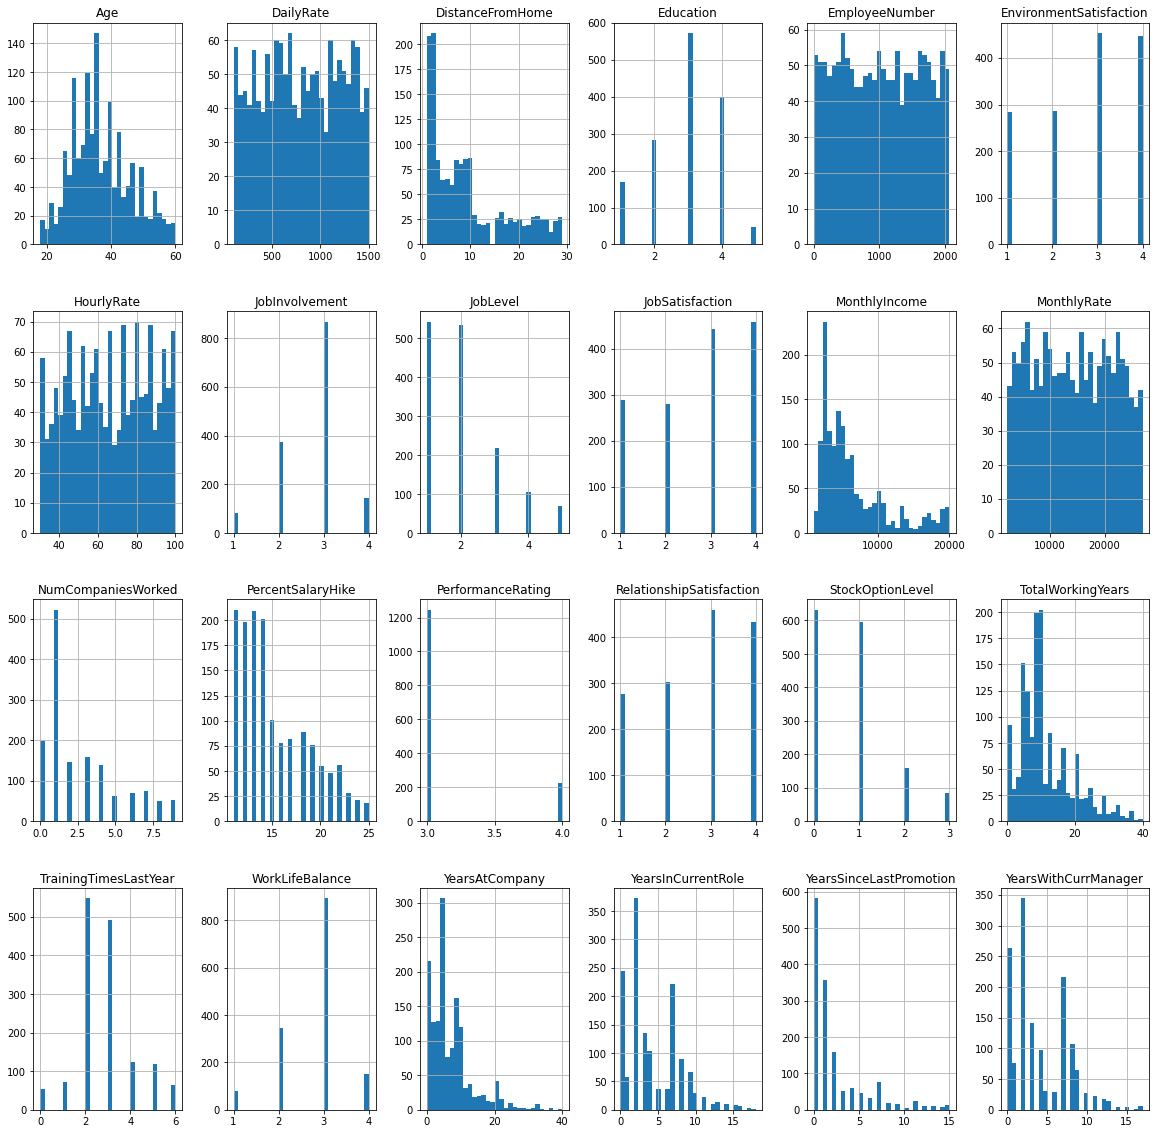

In [69]:
df.hist(figsize=(20,20),grid=True,layout=(4,6),bins=30)

In [70]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

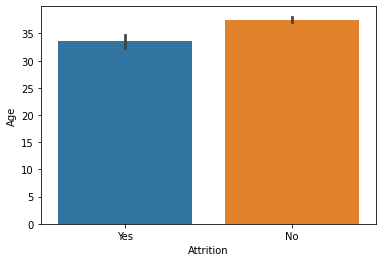

In [109]:
sns.barplot(x='Attrition', y='Age',data=df)

By observing above pattern we can conclude Age factor doesnt affect much on Attrition.

<AxesSubplot:xlabel='Attrition', ylabel='DailyRate'>

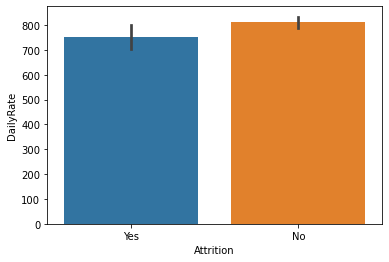

In [108]:
sns.barplot(x='Attrition', y='DailyRate',data=df)

<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

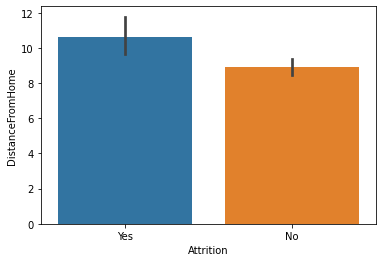

In [107]:
sns.barplot(x='Attrition', y='DistanceFromHome',data=df)

<AxesSubplot:xlabel='Attrition', ylabel='Education'>

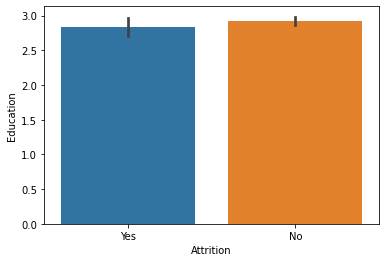

In [78]:
sns.barplot(x='Attrition', y='Education',data=df)

Attrition seems almost equal for Education column.

<AxesSubplot:xlabel='Attrition', ylabel='EmployeeNumber'>

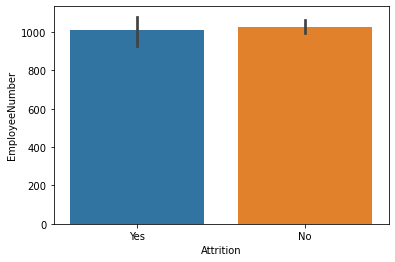

In [79]:
sns.barplot(x='Attrition', y='EmployeeNumber',data=df)

Attrition seems almost equal for EmployeeNumber column.

<AxesSubplot:xlabel='Attrition', ylabel='EnvironmentSatisfaction'>

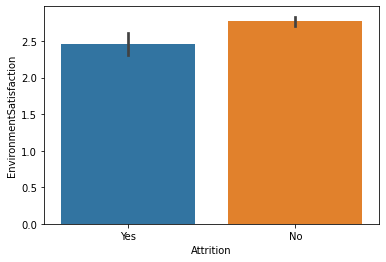

In [80]:
sns.barplot(x='Attrition', y='EnvironmentSatisfaction',data=df)

<AxesSubplot:xlabel='Attrition', ylabel='HourlyRate'>

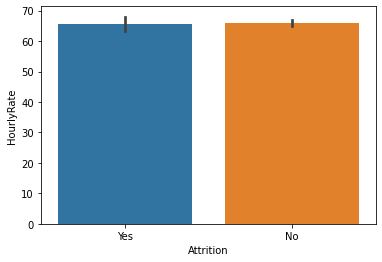

In [82]:
sns.barplot(x='Attrition', y='HourlyRate',data=df)

<AxesSubplot:xlabel='Attrition', ylabel='JobInvolvement'>

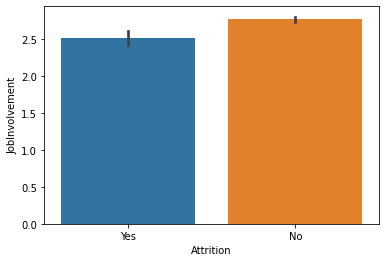

In [83]:
sns.barplot(x='Attrition', y='JobInvolvement',data=df)

<AxesSubplot:xlabel='Attrition', ylabel='JobLevel'>

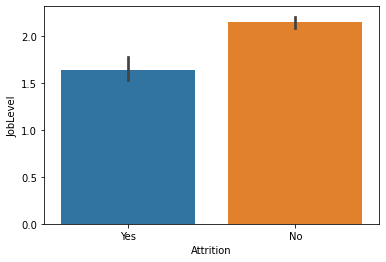

In [84]:
sns.barplot(x='Attrition', y='JobLevel',data=df)

<AxesSubplot:xlabel='Attrition', ylabel='JobSatisfaction'>

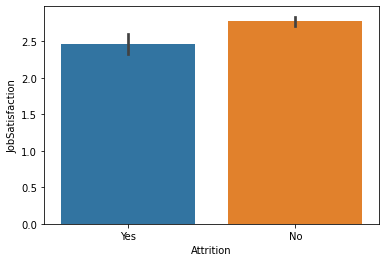

In [86]:
sns.barplot(x='Attrition', y='JobSatisfaction',data=df)

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

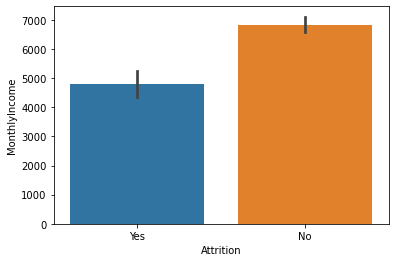

In [88]:
sns.barplot(x='Attrition', y='MonthlyIncome',data=df)

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyRate'>

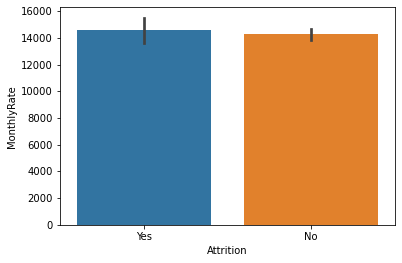

In [89]:
sns.barplot(x='Attrition', y='MonthlyRate',data=df)

<AxesSubplot:xlabel='Attrition', ylabel='NumCompaniesWorked'>

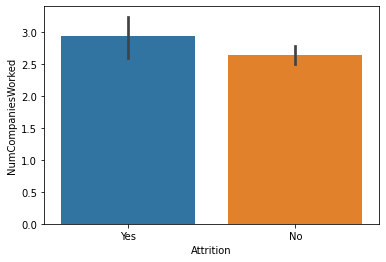

In [90]:
sns.barplot(x='Attrition', y='NumCompaniesWorked',data=df)

<AxesSubplot:xlabel='Attrition', ylabel='PercentSalaryHike'>

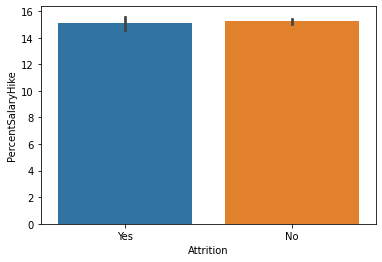

In [91]:
sns.barplot(x='Attrition', y='PercentSalaryHike',data=df)

<AxesSubplot:xlabel='Attrition', ylabel='PerformanceRating'>

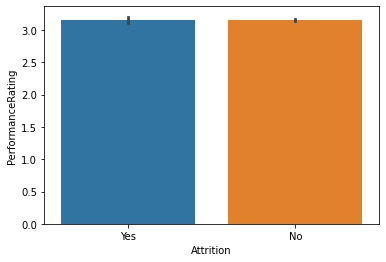

In [92]:
sns.barplot(x='Attrition', y='PerformanceRating',data=df)

<AxesSubplot:xlabel='Attrition', ylabel='RelationshipSatisfaction'>

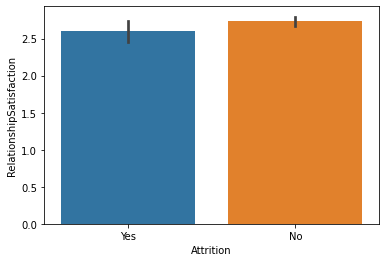

In [93]:
sns.barplot(x='Attrition', y='RelationshipSatisfaction',data=df)

<AxesSubplot:xlabel='Attrition', ylabel='StockOptionLevel'>

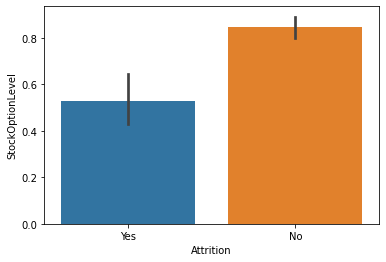

In [94]:
sns.barplot(x='Attrition', y='StockOptionLevel',data=df)

<AxesSubplot:xlabel='Attrition', ylabel='TotalWorkingYears'>

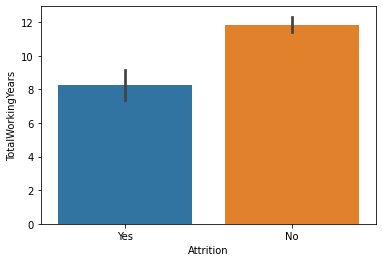

In [95]:
sns.barplot(x='Attrition', y='TotalWorkingYears',data=df)

<AxesSubplot:xlabel='Attrition', ylabel='TrainingTimesLastYear'>

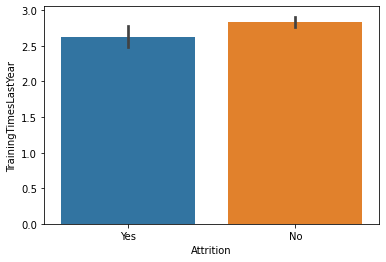

In [96]:
sns.barplot(x='Attrition', y='TrainingTimesLastYear',data=df)

<AxesSubplot:xlabel='Attrition', ylabel='WorkLifeBalance'>

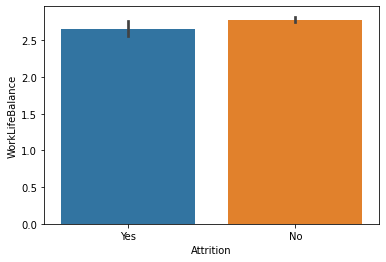

In [97]:
sns.barplot(x='Attrition', y='WorkLifeBalance',data=df)

<AxesSubplot:xlabel='Attrition', ylabel='YearsAtCompany'>

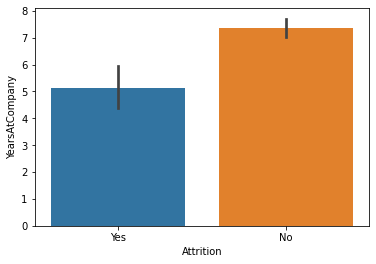

In [98]:
sns.barplot(x='Attrition', y='YearsAtCompany',data=df)

<AxesSubplot:xlabel='Attrition', ylabel='YearsInCurrentRole'>

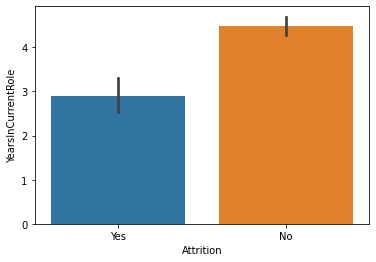

In [99]:
sns.barplot(x='Attrition', y='YearsInCurrentRole',data=df)

<AxesSubplot:xlabel='Attrition', ylabel='YearsSinceLastPromotion'>

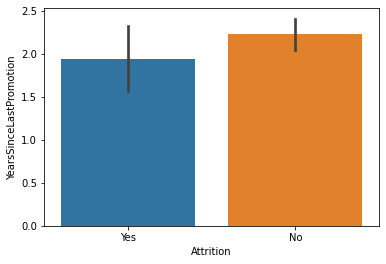

In [100]:
sns.barplot(x='Attrition', y='YearsSinceLastPromotion',data=df)

<AxesSubplot:xlabel='Attrition', ylabel='YearsWithCurrManager'>

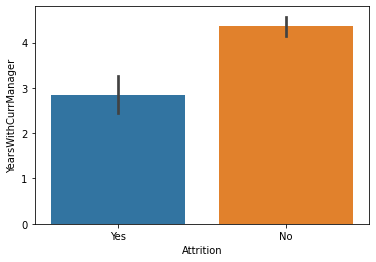

In [101]:
sns.barplot(x='Attrition', y='YearsWithCurrManager',data=df)

<AxesSubplot:xlabel='Attrition', ylabel='YearsWithCurrManager'>

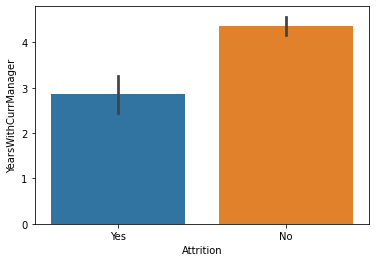

In [103]:
sns.barplot(x='Attrition', y='YearsWithCurrManager',data=df)

LabelEncoder to convert categorical columns into numerical data type.

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int32 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [118]:
df["BusinessTravel"]=le.fit_transform(df["BusinessTravel"])
df["BusinessTravel"].value_counts()

2    1043
1     277
0     150
Name: BusinessTravel, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='BusinessTravel'>

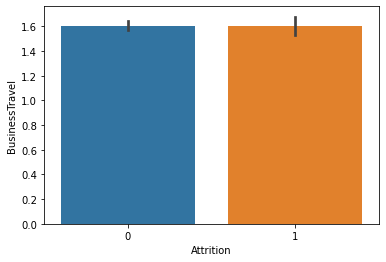

In [149]:
sns.barplot(x='Attrition', y='BusinessTravel',data=df)

In [119]:
df["Department"]=le.fit_transform(df["Department"])
df["Department"].value_counts()

1    961
2    446
0     63
Name: Department, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='Department'>

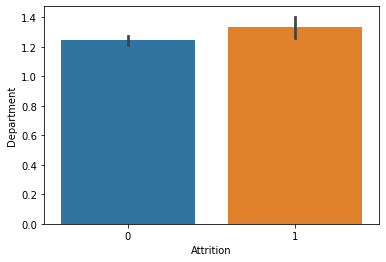

In [155]:
sns.barplot(x='Attrition', y='Department',data=df)

In [120]:
df["EducationField"]=le.fit_transform(df["EducationField"])
df["EducationField"].value_counts()

1    606
3    464
2    159
5    132
4     82
0     27
Name: EducationField, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='EducationField'>

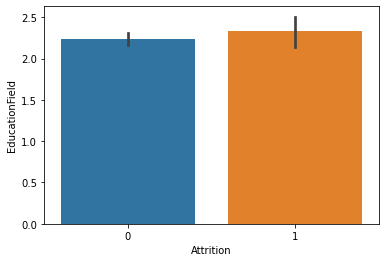

In [154]:
sns.barplot(x='Attrition', y='EducationField',data=df)

In [121]:
df["Gender"]=le.fit_transform(df["Gender"])
df["Gender"].value_counts()

1    882
0    588
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='Gender'>

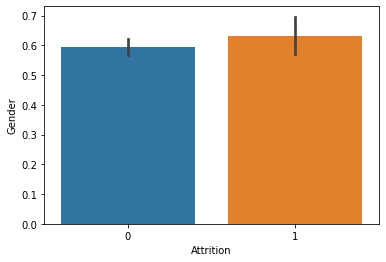

In [153]:
sns.barplot(x='Attrition', y='Gender',data=df)

In [122]:
df["JobRole"]=le.fit_transform(df["JobRole"])
df["JobRole"].value_counts()

7    326
6    292
2    259
4    145
0    131
3    102
8     83
5     80
1     52
Name: JobRole, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='JobRole'>

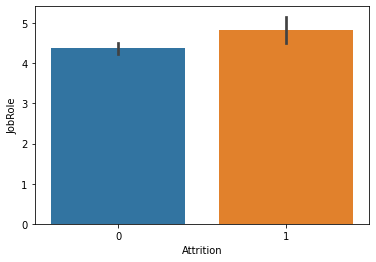

In [152]:
sns.barplot(x='Attrition', y='JobRole',data=df)

In [123]:
df["MaritalStatus"]=le.fit_transform(df["MaritalStatus"])
df["MaritalStatus"].value_counts()

1    673
2    470
0    327
Name: MaritalStatus, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='MaritalStatus'>

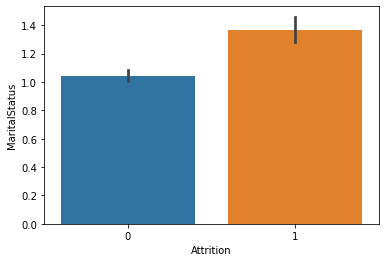

In [151]:
sns.barplot(x='Attrition', y='MaritalStatus',data=df)

In [127]:
df["OverTime"]=le.fit_transform(df["OverTime"])
df["OverTime"].value_counts()

0    1054
1     416
Name: OverTime, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='OverTime'>

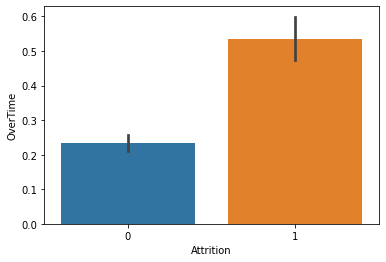

In [150]:
sns.barplot(x='Attrition', y='OverTime',data=df)

In [128]:
df["Attrition"]=le.fit_transform(df["Attrition"])
df["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

We need to balance this column using SMOTE technique.

Applying SMOTE to balance target column (Attrition).

In [49]:
sklearn.__version__

'0.24.2'

In [51]:
np.__version__

'1.20.3'

In [130]:
x = df.drop(['Attrition'],axis=1)
y = df['Attrition']

!pip install -U imbalanced.learn

In [2]:
from imblearn.over_sampling import SMOTE

In [131]:
smt = SMOTE()
trainx,trainy=smt.fit_resample(x,y)

In [146]:
trainx.value_counts()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  EducationField  EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
18   0               198        1           6                 1          3               1075            2                        1       81          3               1         2        2                2              2343           13330        1                   0         14                 3                  3                         0                 0                  0                      3                0               0                   0                        0                       1

In [147]:
trainy.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

In [156]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1024.865306,2.721769,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,602.024335,1.093082,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,491.250000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1020.500000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1555.750000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,2068.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Key Observations:
    1) Data has skewness as for few columns data Mean is not equal to 50%.
    2) For few columns there is slight gap between 75% and max values hence possibility of outliers.

Checking Correlation

In [160]:
df.corr()['Attrition'].sort_values()

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
EmployeeNumber             -0.010577
HourlyRate                 -0.006846
BusinessTravel              0.000074
PerformanceRating           0.002889
MonthlyRate                 0.015170
EducationField              0.026846
Gender                      0.029453
NumCompaniesWorked          0.043494
Department                  0.063991
J

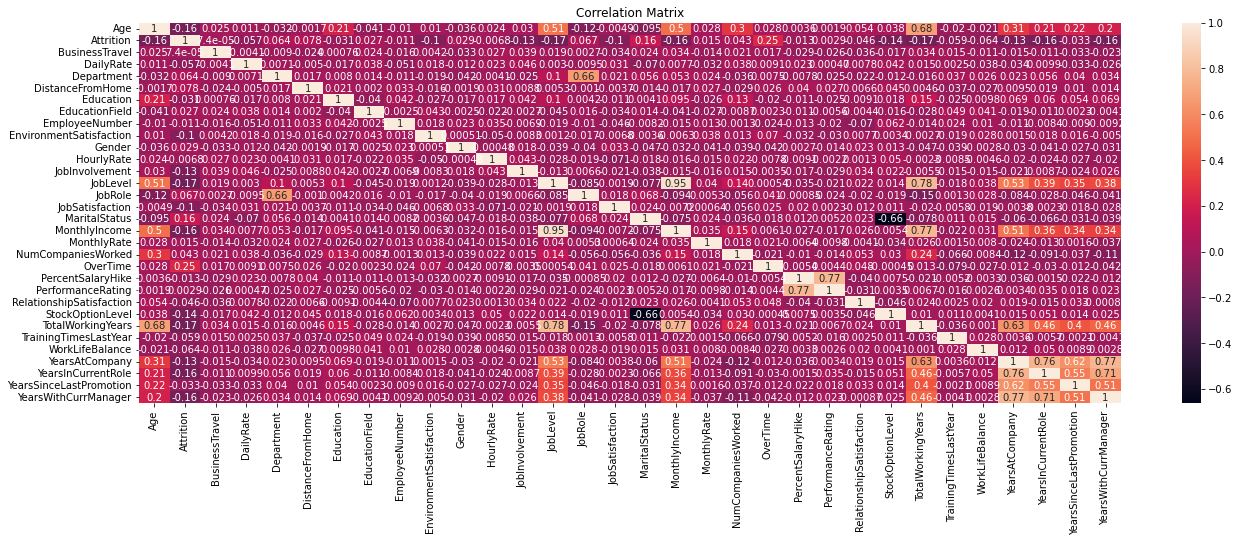

In [161]:
corr_mat = df.corr()
plt.figure(figsize=[22,7])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.savefig('Correlation_matrix.jpg')
plt.show()

Observation:
1) Attrition is highly positively correlated with overtime.
2) Attrition is highly negatively correlated with TotalWorkingYears.

Checking multicollinearity

In [169]:
x1 = df.drop(['Attrition'],axis=1)
y1 = df['Attrition']

In [170]:
df.drop(['JobLevel'],axis=1,inplace=True)

KeyError: "['JobLevel'] not found in axis"

In [162]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled

array([[ 0.4463504 ,  0.59004834,  0.74252653, ..., -0.0632959 ,
        -0.67914568,  0.24583399],
       [ 1.32236521, -0.91319439, -1.2977746 , ...,  0.76499762,
        -0.36871529,  0.80654148],
       [ 0.008343  ,  0.59004834,  1.41436324, ..., -1.16768726,
        -0.67914568, -1.15593471],
       ...,
       [-1.08667552,  0.59004834, -1.60518328, ..., -0.61549158,
        -0.67914568, -0.31487349],
       [ 1.32236521, -0.91319439,  0.54667746, ...,  0.48889978,
        -0.67914568,  1.08689522],
       [-0.32016256,  0.59004834, -0.43256792, ..., -0.33939374,
        -0.36871529, -0.59522723]])

In [163]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features'] = x.columns

vif

,vif,Features
0,2.054226,Age
1,1.016808,BusinessTravel
2,1.026401,DailyRate
3,1.942165,Department
4,1.018096,DistanceFromHome
5,1.065295,Education
6,1.016240,EducationField
7,1.022699,EmployeeNumber
8,1.018022,EnvironmentSatisfaction
9,1.020038,Gender


We can observe Job level and MonthlyIncome have multicollinearity present so we need to drop one of the column. 
I will drop job level column.

In [171]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x1)
X_scaled

array([[ 0.4463504 ,  0.59004834,  0.74252653, ..., -0.0632959 ,
        -0.67914568,  0.24583399],
       [ 1.32236521, -0.91319439, -1.2977746 , ...,  0.76499762,
        -0.36871529,  0.80654148],
       [ 0.008343  ,  0.59004834,  1.41436324, ..., -1.16768726,
        -0.67914568, -1.15593471],
       ...,
       [-1.08667552,  0.59004834, -1.60518328, ..., -0.61549158,
        -0.67914568, -0.31487349],
       [ 1.32236521, -0.91319439,  0.54667746, ...,  0.48889978,
        -0.67914568,  1.08689522],
       [-0.32016256,  0.59004834, -0.43256792, ..., -0.33939374,
        -0.36871529, -0.59522723]])

In [172]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features'] = x1.columns

vif

,vif,Features
0,2.052543,Age
1,1.015286,BusinessTravel
2,1.026098,DailyRate
3,1.849243,Department
4,1.014345,DistanceFromHome
5,1.065267,Education
6,1.015587,EducationField
7,1.022384,EmployeeNumber
8,1.017349,EnvironmentSatisfaction
9,1.019711,Gender


Now Multicollinearity is less than 5 hence we can proceed with further steps.

Checking Skewness

In [173]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

In [174]:
columns = ('BusinessTravel','DistanceFromHome','EducationField','MonthlyIncome','NumCompaniesWorked','OverTime','PercentSalaryHike','PerformanceRating','StockOptionLevel','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager')

for col in columns:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [176]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome           -0.029121
Education                  -0.289681
EducationField             -0.054786
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
OverTime                    0.964489
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears          -0.622175
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

We can observe skewness has been reduced and lies in rage between 0.0035 to 1.9

Checking outliers

Age                            AxesSubplot(0.125,0.787927;0.133621x0.0920732)
Attrition                   AxesSubplot(0.285345,0.787927;0.133621x0.0920732)
BusinessTravel               AxesSubplot(0.44569,0.787927;0.133621x0.0920732)
DailyRate                   AxesSubplot(0.606034,0.787927;0.133621x0.0920732)
Department                  AxesSubplot(0.766379,0.787927;0.133621x0.0920732)
DistanceFromHome               AxesSubplot(0.125,0.677439;0.133621x0.0920732)
Education                   AxesSubplot(0.285345,0.677439;0.133621x0.0920732)
EducationField               AxesSubplot(0.44569,0.677439;0.133621x0.0920732)
EmployeeNumber              AxesSubplot(0.606034,0.677439;0.133621x0.0920732)
EnvironmentSatisfaction     AxesSubplot(0.766379,0.677439;0.133621x0.0920732)
Gender                         AxesSubplot(0.125,0.566951;0.133621x0.0920732)
HourlyRate                  AxesSubplot(0.285345,0.566951;0.133621x0.0920732)
JobInvolvement               AxesSubplot(0.44569,0.566951;0.1336

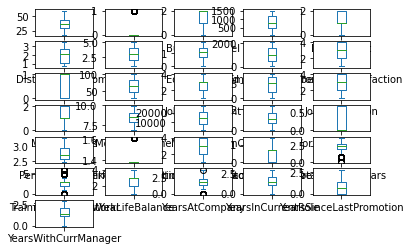

In [180]:
df.plot(kind='box',subplots=True,layout=(7,5))

We can observe outliers are present hence we will remove the outliers now.

In [181]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  23,  127,  296,  301,  457,  615,  727,  828,  972, 1153, 1311],
       dtype=int64),
 array([24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24], dtype=int64))

In [182]:
df = df[(z<3).all(axis=1)]
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,0.693147,2,0.693147,1,2,...,1.386294,1,0.000000,2.197225,0,1,1.945910,1.609438,0.000000,1.791759
1,49,0,1,279,1,2.197225,1,0.693147,2,3,...,1.609438,4,0.693147,2.397895,3,3,2.397895,2.079442,0.693147,2.079442
2,37,1,2,1373,1,1.098612,2,1.609438,4,4,...,1.386294,2,0.000000,2.079442,3,3,0.000000,0.000000,0.000000,0.000000
3,33,0,1,1392,1,1.386294,4,0.693147,5,4,...,1.386294,3,0.000000,2.197225,3,3,2.197225,2.079442,1.386294,0.000000
4,27,0,2,591,1,1.098612,1,1.386294,7,1,...,1.386294,4,0.693147,1.945910,3,3,1.098612,1.098612,1.098612,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,3.178054,2,1.386294,2061,3,...,1.386294,3,0.693147,2.890372,3,3,1.791759,1.098612,0.000000,1.386294
1466,39,0,2,613,1,1.945910,1,1.386294,2062,4,...,1.386294,1,0.693147,2.302585,5,3,2.079442,2.079442,0.693147,2.079442
1467,27,0,2,155,1,1.609438,3,0.693147,2064,2,...,1.609438,2,0.693147,1.945910,0,3,1.945910,1.098612,0.000000,1.386294
1468,49,0,1,1023,2,1.098612,3,1.386294,2065,4,...,1.386294,4,0.000000,2.890372,3,2,2.302585,1.945910,0.000000,2.197225


In [183]:
df.shape

(1459, 31)

%Percentage data loss

In [184]:
Data_loss=((1470-1459)/1470)*100
Data_loss

0.7482993197278911

In [188]:
model = [DecisionTreeClassifier(),SVC(),RandomForestClassifier(),KNeighborsClassifier(),LogisticRegression()]

for i in range(0,50):
    x_train,x_test,y_train,y_test = train_test_split(trainx,trainy,test_size=0.33,random_state=i)
    for models in model:
        models.fit(x_train,y_train)
        prediction = models.predict(x_test)
        accu_Score = accuracy_score(y_test,prediction)
        print("Accuracy score for random state: ", i, " is ",accu_Score)
print()
print()
print()
print()
print()

Accuracy score for random state:  0  is  0.7837837837837838
Accuracy score for random state:  0  is  0.6167076167076168
Accuracy score for random state:  0  is  0.8955773955773956
Accuracy score for random state:  0  is  0.757985257985258
Accuracy score for random state:  0  is  0.6670761670761671
Accuracy score for random state:  1  is  0.8046683046683046
Accuracy score for random state:  1  is  0.597051597051597
Accuracy score for random state:  1  is  0.8918918918918919
Accuracy score for random state:  1  is  0.7506142506142506
Accuracy score for random state:  1  is  0.6732186732186732
Accuracy score for random state:  2  is  0.7960687960687961
Accuracy score for random state:  2  is  0.6117936117936118
Accuracy score for random state:  2  is  0.9398034398034398
Accuracy score for random state:  2  is  0.7714987714987716
Accuracy score for random state:  2  is  0.671990171990172
Accuracy score for random state:  3  is  0.7776412776412777
Accuracy score for random state:  3  is  0.

We can observe the highest accuracy Score:0.914004914004914 is at random state 19 and for model: RandomForestClassifier.

Best Parameter

In [189]:
x1_train,x1_test,y1_train,y1_test = train_test_split(trainx,trainy,test_size=0.33,random_state=19)
rfc = RandomForestClassifier()
parameters={'max_features': ['auto','sqrt','log2']}
gridsearch =GridSearchCV(rfc,parameters)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'max_features': 'sqrt'}

In [190]:
Rfc = RandomForestClassifier(max_features='sqrt')
Rfc.fit(x_train,y_train)
predictions = Rfc.predict(x_test)
AccScore = accuracy_score(y_test,predictions)
print("Accuracy Score is: ",AccScore)

Accuracy Score is:  0.9152334152334153


Accuracy score is 91% with RandomForestClassifier

In [191]:
score = cross_val_score(Rfc,x,y,cv=5)

In [192]:
print("Croos Val Score: ",score)
print("Mean Score: ",score.mean())
print("std Score: ",score.std())

Croos Val Score:  [0.86054422 0.86394558 0.86394558 0.85034014 0.86054422]
Mean Score:  0.8598639455782312
std Score:  0.004998958658741185
